Electonic Appliances Recognizer


```

1. Air Conditioner appliances
2. Iron appliances
3. Clothes Dryer appliances
4. Fan appliances
5. Vacuum Cleaner appliances
6. Rice Cooker appliances
7. Blender appliances
8. Dish Washer appliances
9. Toaster appliances
10. Mixer appliances
11. Heater appliances
12. Coffee Maker appliances
13. Refrigerator appliances
14. Kettle appliances
15. Microwave appliances
16. Griller appliances
17. Air Fryer appliances
18. Speaker appliances
19. Hair dryer appliances
20. Electric Guitar appliances
21. Induction cooktop appliances
22. Electric toothbrush appliances


```






# Setting up necessary things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/MasterCourse/Electronics Recognizer

/content/drive/My Drive/MasterCourse/Electronics Recognizer


# Downloading images from browser

In [ ]:
elec_labels=[
    "Air Conditioner appliances",
    "Iron appliances",
    "Clothes Dryer appliances",
    "Fan appliances",
    "Vacuum Cleaner appliances",
    "Rice Cooker appliances",
    "Blender appliances",
    "Dish Washer appliances",
    "Toaster appliances",
    "Mixer appliances",
    "Heater appliances",
    "Coffee Maker appliances",
    "Refrigerator appliances",
    "Kettle appliances",
    "Microwave appliances",
    "Griller appliances",
    "Air Fryer appliances",
    "Speaker appliances",
    "Hair dryer appliances",
    "Electric Guitar appliances",
    "Induction cooktop appliances ",
    "Electric toothbrush appliances"

]
len(elec_labels)


22

In [ ]:
images=search_images_ddg(elec_labels[0],max_images=250)
f'No. of images {len(images)} -- one image url -> {images[0]}'

'No. of images 250 -- one image url -> https://homedepot.scene7.com/is/image/homedepotcanada/p_1001214189.jpg?wid=1000&hei=1000&op_sharpen=1'

In [ ]:
dest='sample-AC.jpg'
download_url(images[0],dest,show_progress=False)

Path('sample-AC.jpg')

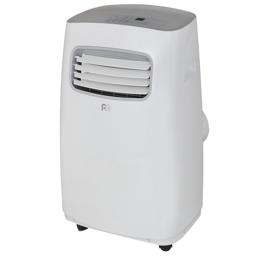

In [ ]:
image=Image.open(dest)
image.to_thumb(256,256)

# Combining All

In [ ]:
data_path='data'

if not os.path.exists(data_path):
  os.mkdir(data_path)

for elec_type in elec_labels:

  dest=f"{data_path}/{elec_type}"

  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    elec_image_urls=search_images_ddg(elec_type)
    download_images(dest,urls=elec_image_urls)

  except:
    continue



In [ ]:
image_counts=get_image_files(data_path)
image_counts

(#4151) [Path('data/Air Conditioner appliances/f94536a6-b7c3-4552-8881-1c144b17c2fb.jpg'),Path('data/Air Conditioner appliances/a41c5775-231f-441d-a52c-6d2f8092a736.jpg'),Path('data/Air Conditioner appliances/f7429fee-4b24-4c3f-bb3c-476c7e72298d.jpg'),Path('data/Air Conditioner appliances/9fde5cd0-994c-49aa-90da-b963114e5407.png'),Path('data/Air Conditioner appliances/6a8de03a-dd74-4a67-af67-e7c3c73cbf57.jpg'),Path('data/Air Conditioner appliances/a0cd82b9-9881-4a47-87af-eee12b820718.jpg'),Path('data/Air Conditioner appliances/980160fc-d142-43e2-9cfd-5182df31324f.jpg'),Path('data/Air Conditioner appliances/97b597c3-a25a-4f2f-9bcf-dd0dec972294.jpg'),Path('data/Air Conditioner appliances/a165b621-7c33-4294-9487-e29286a6f2ff.jpg'),Path('data/Air Conditioner appliances/79b7bf85-ebd7-43cf-9f8b-8d43d474175a.jpg')...]

In [ ]:
failed=verify_images(image_counts)
failed

(#69) [Path('data/Air Conditioner appliances/980160fc-d142-43e2-9cfd-5182df31324f.jpg'),Path('data/Air Conditioner appliances/f29a81a7-2a26-4581-9493-746f94971f8f.jpg'),Path('data/Air Conditioner appliances/27819360-50fc-4487-8cec-1702aaee5478.jpg'),Path('data/Air Conditioner appliances/16973ad1-ac14-45c8-b178-8b68bbe65f97.jpg'),Path('data/Air Conditioner appliances/60bda340-ab54-4120-85b2-2d71b4a8fec7.jpg'),Path('data/Air Conditioner appliances/80ac1564-117b-4ee8-b050-d89f1b47af49.jpg'),Path('data/Air Conditioner appliances/67c27f15-8d20-4336-8bc1-3dd3b20a18fe.jpg'),Path('data/Air Conditioner appliances/74b7e1d9-3a1f-4e90-949d-8724c0fa9dad.jpg'),Path('data/Air Conditioner appliances/f4af7fbe-45aa-4f35-8610-843af7e5195b.jpg'),Path('data/Iron appliances/0acb58ca-7e23-4a68-8821-8efb78a97db8.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#69) [None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

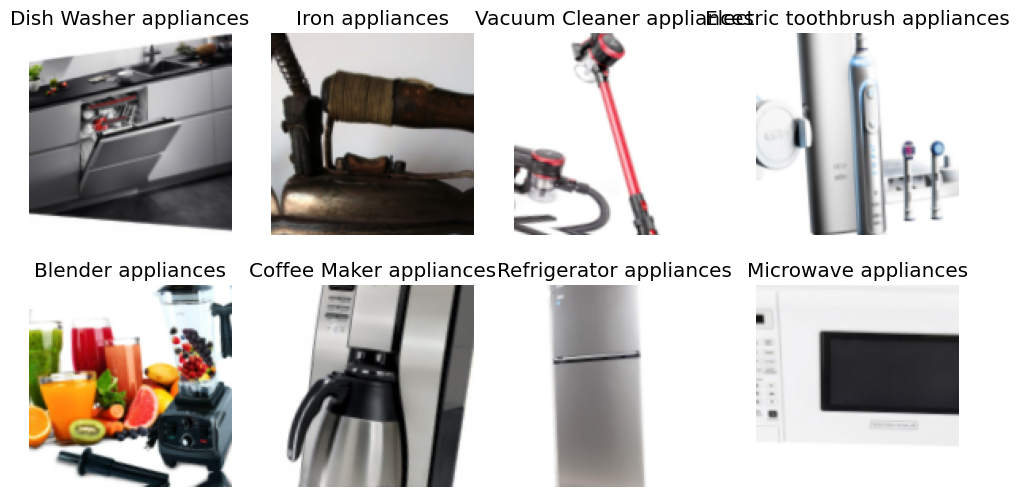

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

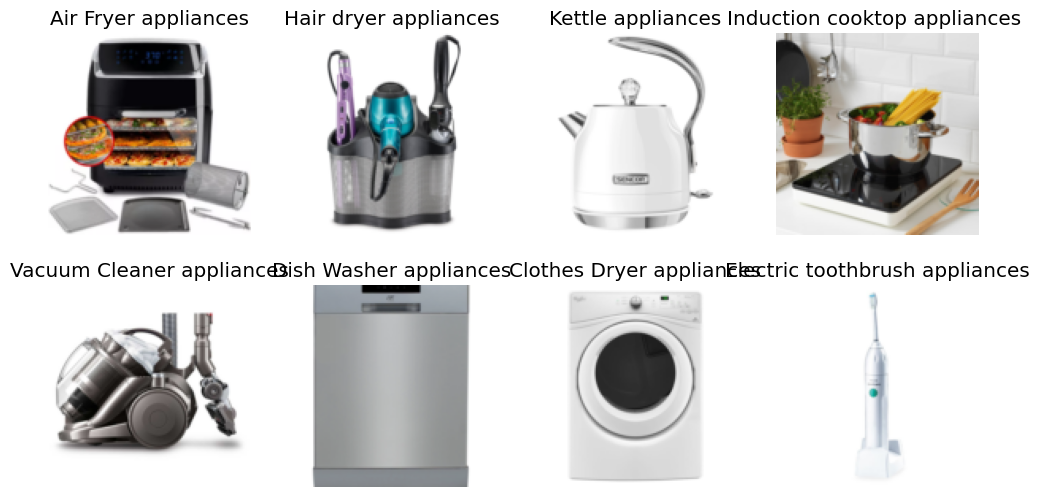

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

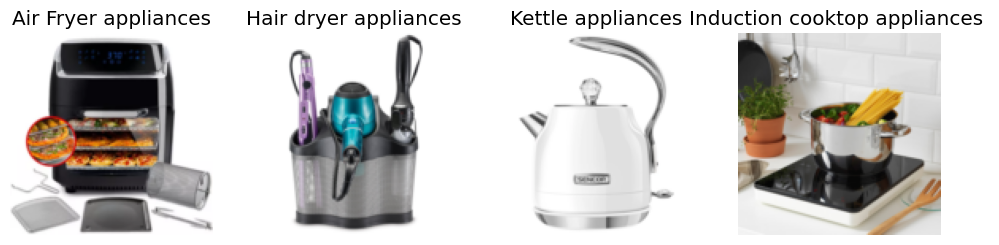

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

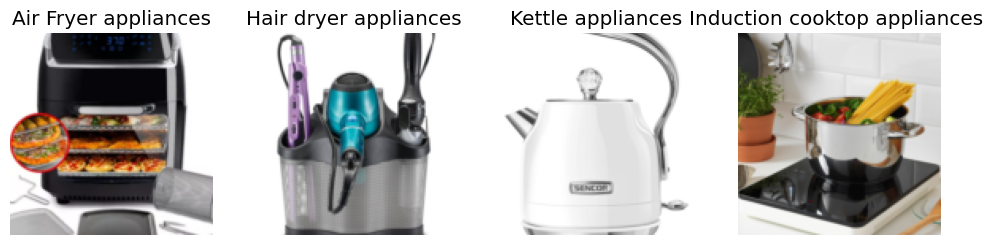

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

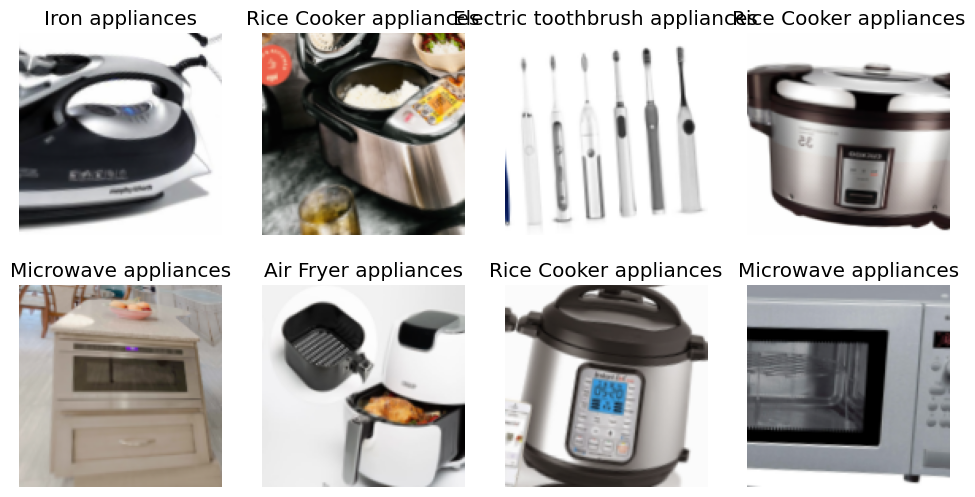

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls,'electronics_dataloader_v0.pkl')